# Analyse Exploratoire des Données (EDA) pour la Prédiction de Sentiment

## Contexte du Projet

Ce notebook fait partie d'un projet visant à construire un modèle de prédiction de sentiment sur des commentaires textuels. L'objectif est d'analyser un dataset public de commentaires pour comprendre la nature des données, identifier les tendances liées au sentiment, et préparer les données pour l'entraînement d'un modèle de machine learning qui pourra être intégré dans une application web.

Ce projet est développé au sein de l'organisation GitHub INFO-DECISIO dans le cadre du cours Informatique décisionnel.

## Source du Dataset

Le dataset utilisé pour cette analyse provient de Kaggle et contient des commentaires associés à un sentiment. Il est disponible ici :
[Lien vers le dataset Kaggle](`https://www.kaggle.com/code/alokkumar2507/sentiment-analysis-eda-and-prediction/input`)

*(Note : Le fichier du dataset doit être téléchargé depuis Kaggle et placé dans le dossier `data/` du projet.)*

## Objectifs de l'EDA

L'objectif de cette phase d'exploration est de :
1. Comprendre la structure et le contenu du dataset.
2. Analyser la distribution des sentiments.
3. Explorer les caractéristiques du texte des commentaires (longueur, mots fréquents).
4. Identifier les problèmes potentiels dans les données (valeurs manquantes, texte "bruité").
5. Obtenir des insights qui guideront les étapes de prétraitement et de modélisation.

## 1. Importation des Bibliothèques et Chargement des Données

Dans cette section, nous importons les bibliothèques Python nécessaires pour l'analyse des données et le chargement du dataset.

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure les options d'affichage pour les DataFrames pandas
pd.set_option('display.max_columns', None) # Affiche toutes les colonnes
pd.set_option('display.max_rows', None)    # Affiche toutes les lignes (prudence avec les gros datasets)
pd.set_option('display.max_colwidth', None) # Affiche le contenu complet des cellules

sns.set_style("whitegrid") # Définit le style des graphiques seaborn

### Chargement du Dataset
Nous chargeons le fichier CSV du dataset depuis le dossier `data/`.

In [ ]:
# Chargement du dataset
# Assurez-vous que le fichier CSV est dans le dossier 'data/' et remplacez 'votre_fichier_dataset.csv' par le nom réel.
file_path = '../data/sentiment_analysis.csv' #

try:
    df = pd.read_csv(file_path)
    print("Dataset chargé avec succès.")
    print(f"Nombre de lignes : {df.shape[0]}")
    print(f"Nombre de colonnes : {df.shape[1]}")
except FileNotFoundError:
    print(f"Erreur : Le fichier {file_path} n'a pas été trouvé.")
    print("Veuillez télécharger le dataset depuis Kaggle et le placer dans le dossier 'data/'.")
    df = None # Assure que df est None en cas d'erreur

Dataset chargé avec succès.
Nombre de lignes : 499
Nombre de colonnes : 7


*Commentaire :* Cette section charge les données. La gestion d'erreur permet de vérifier si le fichier est bien là. Les premières informations (nombre de lignes/colonnes) donnent un premier aperçu de la taille du dataset.

## 2. Inspection Initiale des Données

Nous allons maintenant inspecter les premières lignes du dataset, vérifier les types de données, les valeurs manquantes et obtenir un résumé statistique.

### Aperçu des Données
Affichons les premières lignes pour comprendre la structure des colonnes et le format des données.

In [3]:
if df is not None:
    print("\nPremières 5 lignes du dataset :")
    display(df.head())


Premières 5 lignes du dataset :


,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teachers reading on slide. Just Nonsence,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [4]:
if df is not None:
    print("\nInformations sur le dataset :")
    df.info()


Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


### Statistiques Descriptives
Un résumé statistique pour les colonnes numériques, si elles existent.

In [5]:
if df is not None:
    print("\nStatistiques descriptives :")
    display(df.describe())


Statistiques descriptives :


,Year,Month,Day
count,499.000000,499.000000,499.000000
mean,2020.394790,6.084168,15.693387
std,2.830991,3.652711,8.804673
min,2010.000000,1.000000,1.000000
25%,2019.000000,2.000000,8.000000
50%,2021.000000,6.000000,15.000000
75%,2023.000000,9.000000,22.000000
max,2023.000000,12.000000,31.000000


## 3. Analyse de la Variable Cible (Sentiment)

Nous allons maintenant explorer la distribution des différentes catégories de sentiment dans le dataset.

### Distribution des Sentiments
Comptons et visualisons le nombre d'occurrences pour chaque catégorie de sentiment.


Distribution des sentiments dans la colonne 'sentiment' :
sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64


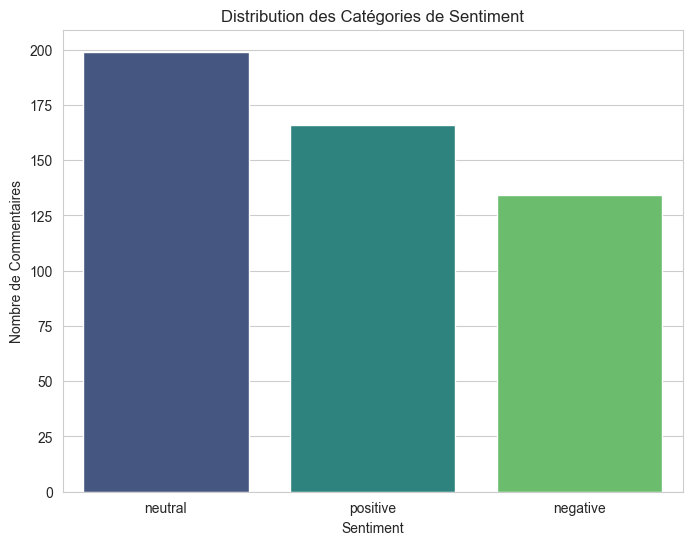

In [11]:
sentiment_column = 'sentiment'

if df is not None and sentiment_column in df.columns:
    print(f"\nDistribution des sentiments dans la colonne '{sentiment_column}' :")
    sentiment_counts = df[sentiment_column].value_counts()
    print(sentiment_counts)

    # Visualisation de la distribution des sentiments
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=sentiment_column, order=sentiment_counts.index, palette='viridis')
    plt.title('Distribution des Catégories de Sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel('Nombre de Commentaires')
    plt.xticks(rotation=0) # Adaptez si les noms de sentiment sont longs
    plt.show()

elif df is not None:
    print(f"Erreur : La colonne de sentiment '{sentiment_column}' n'a pas été trouvée dans le dataset.")
    print("Veuillez vérifier le nom de la colonne.")

*Commentaire :* Ce graphique montre la répartition des classes de sentiment. S'il y a une différence significative dans le nombre d'échantillons par classe, le dataset est déséquilibré. Cela aura des implications pour le choix du modèle et des métriques d'évaluation, ainsi que potentiellement pour les techniques de prétraitement (gestion du déséquilibre).

## 4. Analyse des Caractéristiques du Texte

Explorons maintenant le contenu textuel des commentaires eux-mêmes. La longueur des commentaires et la fréquence des mots peuvent fournir des insights.

### Longueur des Commentaires
Analysons la distribution de la longueur des commentaires.


Statistiques sur la longueur des commentaires :
count    499.000000
mean      59.833667
std       35.116822
min        4.000000
25%       32.000000
50%       52.000000
75%       83.000000
max      138.000000
Name: text_length, dtype: float64


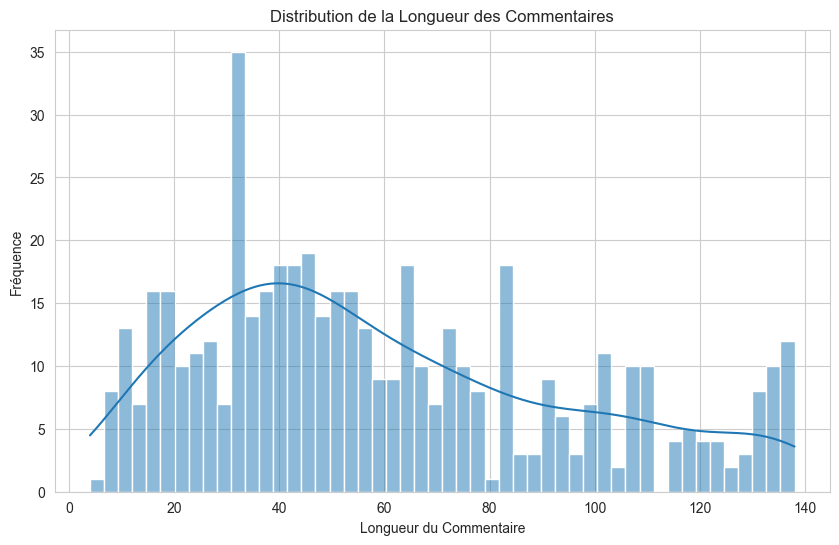

In [7]:
text_column = 'text'

if df is not None and text_column in df.columns:
    df['text_length'] = df[text_column].astype(str).apply(len) # Calculer la longueur du texte

    print("\nStatistiques sur la longueur des commentaires :")
    print(df['text_length'].describe())

    # Visualisation de la distribution de la longueur des commentaires
    plt.figure(figsize=(10, 6))
    sns.histplot(df['text_length'], bins=50, kde=True)
    plt.title('Distribution de la Longueur des Commentaires')
    plt.xlabel('Longueur du Commentaire')
    plt.ylabel('Fréquence')
    plt.show()

elif df is not None:
     print(f"Erreur : La colonne de texte '{text_column}' n'a pas été trouvée dans le dataset.")
     print("Veuillez vérifier le nom de la colonne.")

### Mots les Plus Fréquents
Identifions les mots les plus courants dans l'ensemble du corpus. Cela nécessite un prétraitement de base (tokenisation, suppression des mots vides).
Nous ferons une analyse plus poussée lors de l'étape de prétraitement, mais une première exploration est utile ici.

In [13]:
# %% [code]
# Analyse des mots les plus fréquents
# Cette partie nécessite la bibliothèque NLTK

import nltk
from nltk.corpus import stopwords
from collections import Counter
import string # Pour la suppression de la ponctuation

# Téléchargement des stopwords si nécessaire
try:
    stop_words_english = set(stopwords.words('english')) # Assurez-vous que le dataset est en anglais ou ajustez la langue
    # Combine les stopwords si nécessaire
    all_stop_words = stop_words_english
except LookupError:
    print("Téléchargement des stopwords NLTK...")
    nltk.download('stopwords')
    stop_words_english = set(stopwords.words('english'))
    all_stop_words = stop_words_english # Adaptez selon la langue de votre dataset
    print("Téléchargement terminé.")

if df is not None and text_column in df.columns:
    # Nettoyage simple et tokenisation pour l'analyse de fréquence
    # Combine tout le texte, convertit en minuscules, supprime la ponctuation et les mots vides
    all_text_combined = " ".join(df[text_column].dropna()).lower()

    # Supprimer la ponctuation
    all_text_no_punct = all_text_combined.translate(str.maketrans('', '', string.punctuation))

    # Tokenisation simple (diviser par espaces) et suppression des mots vides
    words = [word for word in all_text_no_punct.split() if word not in all_stop_words and len(word) > 1] # Supprime aussi les mots d'une seule lettre

    # Compter les mots les plus fréquents
    most_common_words = Counter(words).most_common(30) # Top 30 mots

    print("\n30 mots les plus fréquents (après nettoyage basique et suppression des stopwords) :")
    display(most_common_words)


30 mots les plus fréquents (après nettoyage basique et suppression des stopwords) :


[('im', 78),
 ('day', 43),
 ('love', 32),
 ('know', 30),
 ('like', 28),
 ('going', 28),
 ('go', 26),
 ('dont', 25),
 ('happy', 24),
 ('really', 22),
 ('today', 21),
 ('back', 21),
 ('got', 19),
 ('good', 18),
 ('want', 17),
 ('tomorrow', 16),
 ('amazing', 15),
 ('new', 15),
 ('thats', 15),
 ('miss', 14),
 ('time', 14),
 ('morning', 14),
 ('get', 14),
 ('home', 13),
 ('need', 13),
 ('one', 13),
 ('sorry', 12),
 ('night', 12),
 ('much', 12),
 ('mothers', 12)]

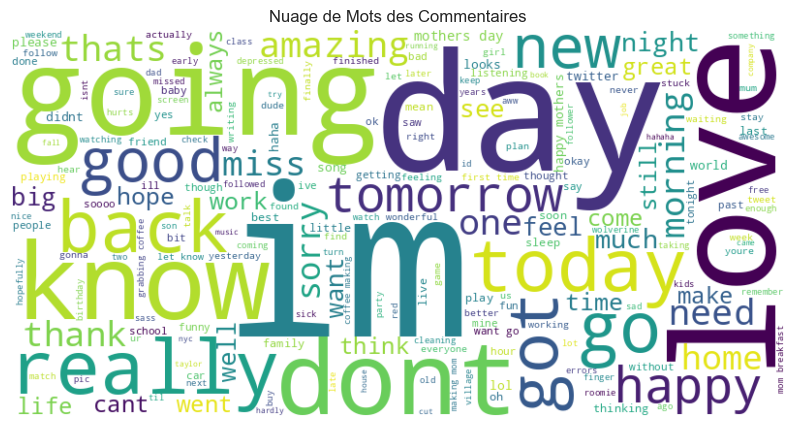

In [14]:
# Génération du Word Cloud
# Installez la bibliothèque si nécessaire : pip install wordcloud

from wordcloud import WordCloud

if 'words' in locals() and len(words) > 0: # Vérifie si la liste 'words' a été créée et n'est pas vide
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") # Masque les axes
    plt.title('Nuage de Mots des Commentaires')
    plt.show()
elif df is not None and text_column in df.columns:
     print("Impossible de générer le word cloud : la liste de mots est vide ou n'a pas pu être créée. Vérifiez la colonne de texte et le processus de nettoyage.")


*Commentaire :* Le nuage de mots offre une représentation visuelle de la fréquence des mots. Les mots plus grands sont plus fréquents. Cela peut aider à identifier rapidement les termes importants.

### Mots Fréquents par Catégorie de Sentiment

Analyser les mots les plus fréquents pour chaque sentiment peut révéler des termes discriminants.


--- Mots les plus fréquents pour le sentiment : 'positive' ---


[('day', 28),
 ('im', 26),
 ('love', 26),
 ('happy', 21),
 ('really', 15),
 ('amazing', 13),
 ('mothers', 12),
 ('good', 10),
 ('great', 8),
 ('fun', 8),
 ('morning', 8),
 ('thanks', 8),
 ('today', 7),
 ('time', 7),
 ('new', 7),
 ('world', 7),
 ('thats', 7),
 ('going', 7),
 ('much', 7),
 ('song', 6)]

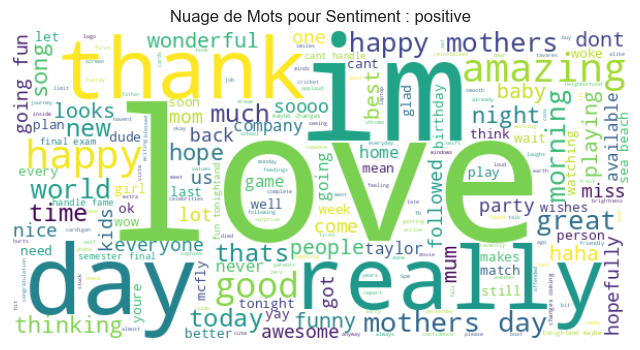


--- Mots les plus fréquents pour le sentiment : 'negative' ---


[('im', 33),
 ('dont', 16),
 ('sorry', 8),
 ('want', 7),
 ('miss', 7),
 ('going', 7),
 ('tomorrow', 7),
 ('well', 6),
 ('feel', 6),
 ('got', 5),
 ('still', 5),
 ('day', 5),
 ('mine', 5),
 ('class', 4),
 ('lost', 4),
 ('feeling', 4),
 ('10', 4),
 ('depressed', 4),
 ('please', 4),
 ('cant', 4)]

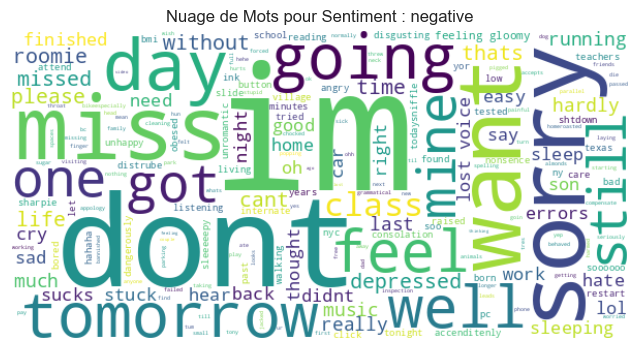


--- Mots les plus fréquents pour le sentiment : 'neutral' ---


[('im', 19),
 ('back', 14),
 ('going', 14),
 ('today', 13),
 ('got', 10),
 ('day', 10),
 ('big', 9),
 ('days', 8),
 ('need', 8),
 ('want', 8),
 ('always', 7),
 ('tomorrow', 7),
 ('home', 7),
 ('love', 6),
 ('went', 6),
 ('new', 6),
 ('coffee', 6),
 ('one', 6),
 ('work', 6),
 ('though', 5)]

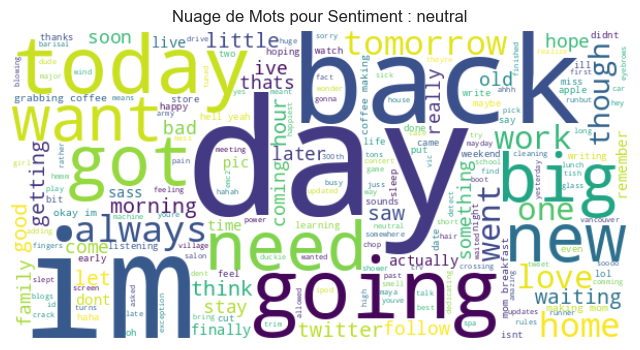

In [16]:
# Analyse des mots fréquents par catégorie de sentiment
sentiment_categories = df[sentiment_column].unique() # Obtient toutes les catégories uniques

# Quelques stopwords supplémentaires qui pourraient apparaître après le premier nettoyage
# Ajoutez ici des mots qui sont très fréquents mais non pertinents pour le sentiment
additional_stopwords = set(['comment', 'user', 'like', 'get', 'make', 'go', 'see', 'know']) 

all_stop_words_extended = all_stop_words.union(additional_stopwords)


if df is not None and text_column in df.columns and sentiment_column in df.columns:
    for sentiment in sentiment_categories:
        print(f"\n--- Mots les plus fréquents pour le sentiment : '{sentiment}' ---")

        # Filtrer le DataFrame pour le sentiment actuel
        df_sentiment = df[df[sentiment_column] == sentiment]

        # Combiner le texte, nettoyer, tokeniser et supprimer les stopwords étendus
        sentiment_text_combined = " ".join(df_sentiment[text_column].dropna()).lower()
        sentiment_text_no_punct = sentiment_text_combined.translate(str.maketrans('', '', string.punctuation))
        sentiment_words = [word for word in sentiment_text_no_punct.split() if word not in all_stop_words_extended and len(word) > 1]

        if len(sentiment_words) > 0:
            # Compter les mots les plus fréquents pour ce sentiment
            most_common_sentiment_words = Counter(sentiment_words).most_common(20)
            display(most_common_sentiment_words)

            # Générer un Word Cloud par sentiment
            plt.figure(figsize=(8, 5))
            wordcloud_sentiment = WordCloud(width=600, height=300, background_color='white').generate(" ".join(sentiment_words))
            plt.imshow(wordcloud_sentiment, interpolation='bilinear')
            plt.axis("off")
            plt.title(f'Nuage de Mots pour Sentiment : {sentiment}')
            plt.show()
        else:
            print("Pas assez de mots pour cette catégorie de sentiment pour une analyse de fréquence pertinente.")

#  L'analyse par sentiment met en évidence les termes qui sont particulièrement associés à chaque catégorie.
#  Par exemple, des mots comme "super", "excellent" pour un sentiment positif, ou "déçu", "problème" pour un négatif.
#  Cela aide à comprendre le signal dans les données et peut guider le choix des caractéristiques pour le modèle.

## 6. Conclusions de l'EDA et Prochaines Étapes

Cette analyse exploratoire des données nous a permis d'obtenir une meilleure compréhension du dataset et des caractéristiques du texte.

### Résumé des Principales Observations :
* Le dataset contient 499 lignes et 7 colonnes, dont la colonne de texte ('text') et la colonne de sentiment ('sentiment').
* La distribution des sentiments est déséquilibrée, avec la classe neutral étant majoritaire. Cela est un point important à considérer pour la modélisation.
* La longueur des commentaires varie de 4 à 134 mots/caractères, avec une moyenne de 59.
* L'analyse de la longueur des commentaires montre que la majorité [décrivez la tendance - sont courts, longs, etc.], ce qui peut influencer la vectorisation et le choix du modèle.
* Les mots les plus fréquents dans l'ensemble du corpus sont ['day', 'love', etc].

### Prochaines Étapes :
Sur la base de cette EDA, les prochaines étapes du projet seront :
1. **Prétraitement des Données :** Nettoyage plus poussé du texte, tokenisation, suppression des mots vides (avec une liste potentiellement affinée), normalisation (stemming/lemmatisation), et vectorisation du texte en utilisant des techniques appropriées (TF-IDF, Word Embeddings, etc.).
2. **Gestion du Déséquilibre des Classes :** Appliquer des techniques si nécessaire avant l'entraînement.
3. **Modélisation :** Sélectionner, entraîner et évaluer différents modèles de machine learning pour la classification de texte.
4. **Évaluation et Sélection du Modèle Final :** Choisir le meilleur modèle en fonction des métriques de performance *adaptées aux classes déséquilibrées* et des contraintes de déploiement (vitesse, taille).
5. **Documentation Approfondie.**

L'analyse détaillée du prétraitement, de la modélisation et de l'évaluation se poursuivra dans les notebooks suivants.